# Qualitative Analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

import seaborn as sns

from os import listdir
from os.path import isfile, join


#Parsing:
import dateparser # $ pip install dateparser



import re

#Wordcloud:
from wordcloud import WordCloud

- Essayer de voir ce qui se passe sur Twitter
    - Au niveau des Hashtags: ceux d'émissions de TV ? 
    - Au niveau des Comptes cités: pareil 

- Essayer de voir sur YT par exemple 
    - Il semblerait, après un petit check, que la plupart des vidéos sont en fait des vidéos issues de chaines TV. 

- Comparaison Factiva / Twitter:
    - Nuages de mots? (en selectionnant les X articles/tweets les plus lus/vus)
        - Ou alors selectionner seulement certaines sources sur Factiva
        
        
**Est-ce qu'il y a un pic sauf pour ceux qui n'étaient pas invité à Face à La guerre??**

On pourrait faire comme critique: 
- Y a t'il le même nombre de tweets entre ceux qui citent le compte explicitement et ceux qui ne disent que le nom. 
    - i.e. "Mélenchon" et "@..."

## Hashtags // Accounts

### Hashtags

In [8]:
#Listing all the files in the folder:
rel_path_tweets_10RT = 'data/tweets/10'
files_tweets_10RT = [f for f in listdir(rel_path_tweets_10RT) if isfile(join(rel_path_tweets_10RT, f))]
#Initializing a pd df:
df_tweets_10RT = pd.DataFrame()
for f in files_tweets_10RT:
    df_temp = pd.read_csv(rel_path_tweets_10RT+'/'+f)
    #Concat:
    df_tweets_10RT = pd.concat([df_tweets_10RT, df_temp])

In [13]:
selected_tweet_cols = ['id', 'text', 'retweet_count', 'candidate']

df_tweets_red = df_tweets_10RT[selected_tweet_cols].copy()

In [28]:
#Is this the right regex to extract hashtags?
df_tweets_red['hashtag'] = df_tweets_red['text'].str.findall(r"#(\w+)")
#Exploding:
df_tweets_red = df_tweets_red.explode('hashtag').reset_index(drop=True)

In [33]:
df_hashtags = df_tweets_red.groupby(['hashtag', 'candidate'])['retweet_count'].sum().reset_index().copy()

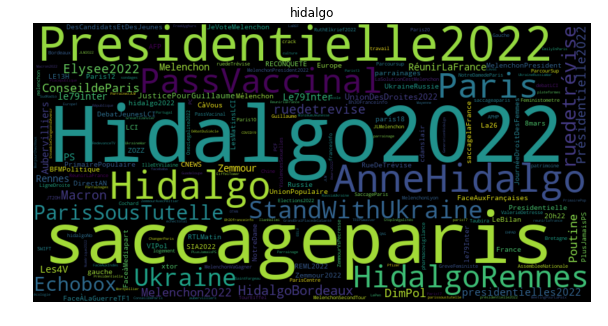

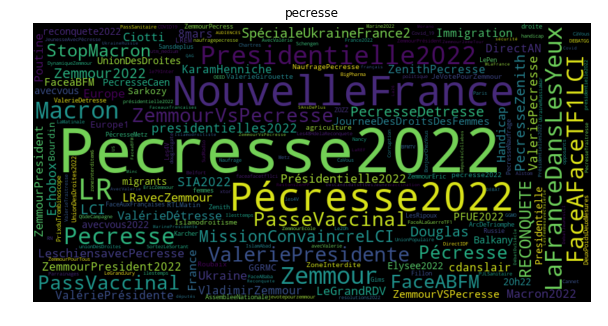

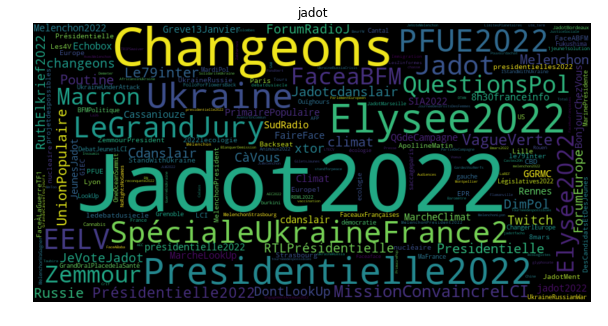

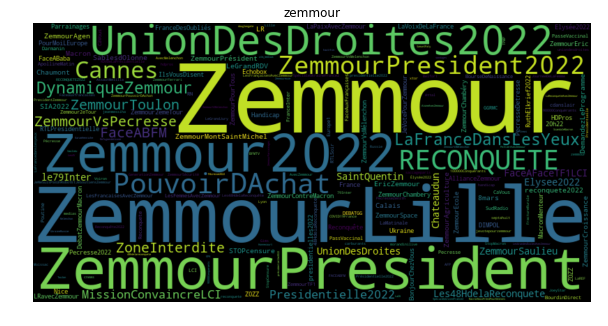

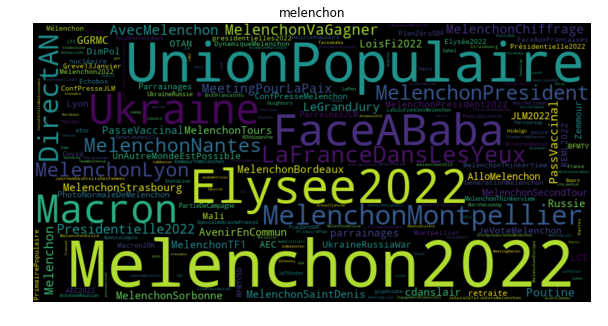

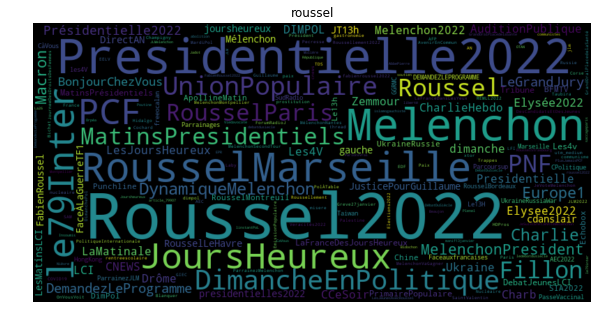

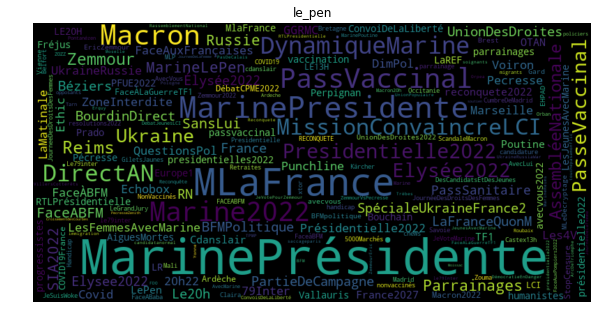

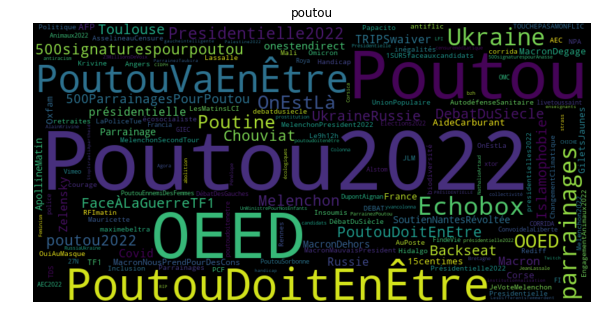

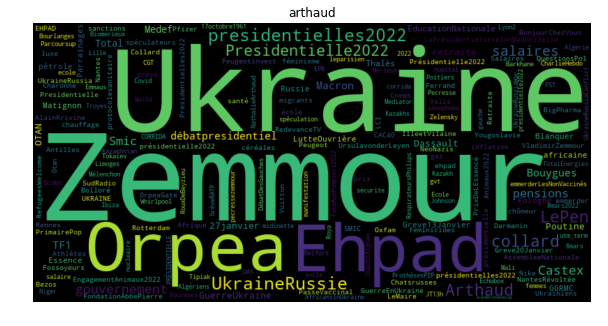

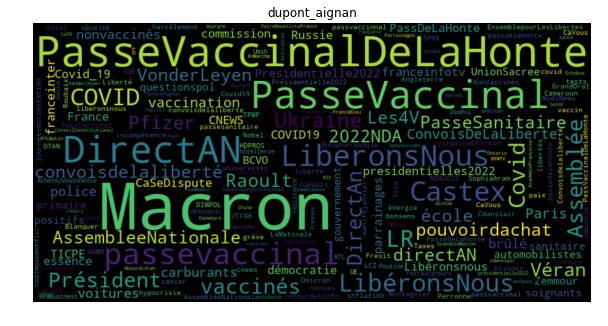

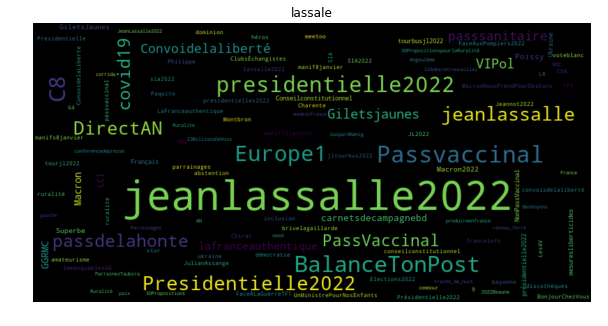

In [37]:
#convert to dict
for cand in df_hashtags['candidate'].unique():

    hashtag_weights = df_hashtags[df_hashtags['candidate']==cand].set_index('hashtag').to_dict()['retweet_count']
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(hashtag_weights)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(cand)
    plt.axis('off')
    plt.show()

### Cited Accoutns

In [38]:
#Is this the right regex to extract hashtags?
df_tweets_red['accounts'] = df_tweets_red['text'].str.findall(r"@(\w+)")
#Exploding:
df_tweets_red = df_tweets_red.explode('accounts').reset_index(drop=True)

In [39]:
df_accounts = df_tweets_red.groupby(['accounts', 'candidate'])['retweet_count'].sum().reset_index().copy()

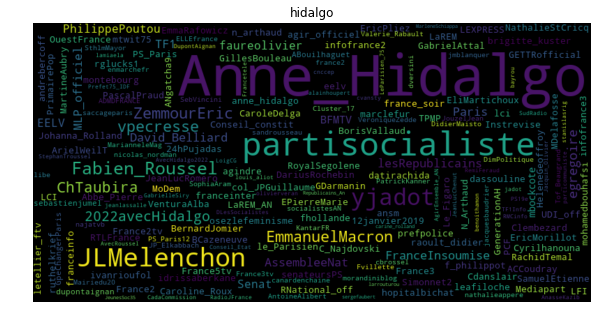

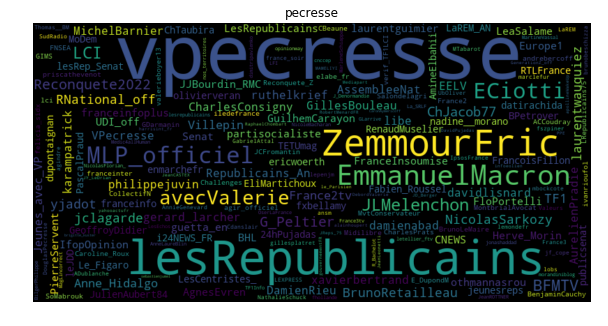

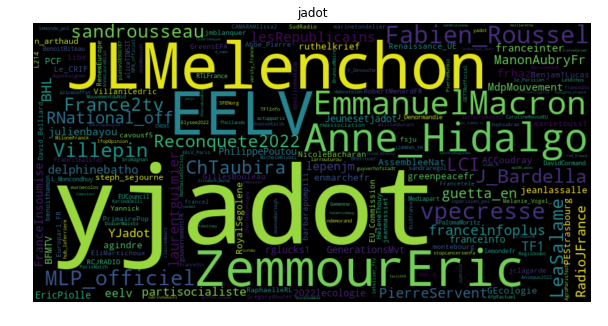

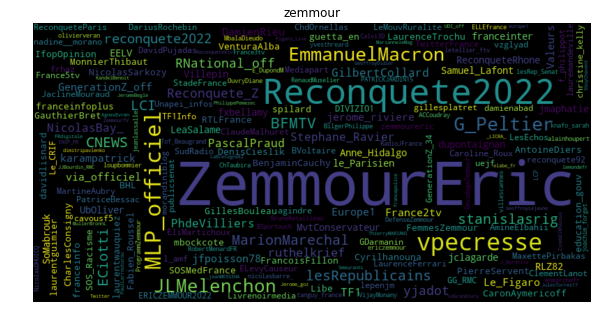

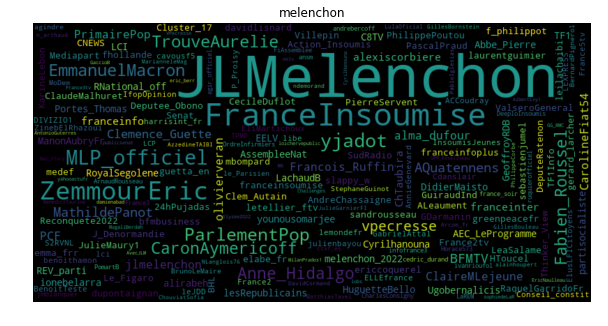

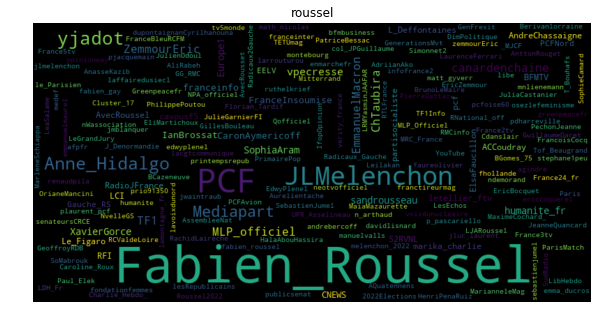

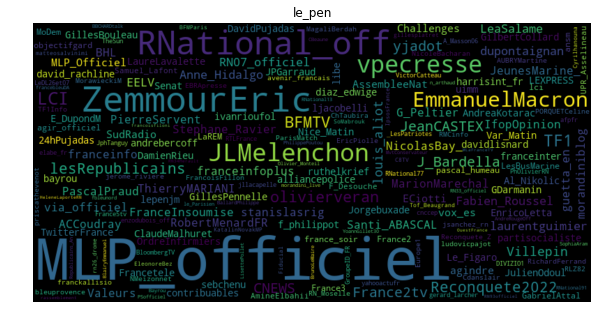

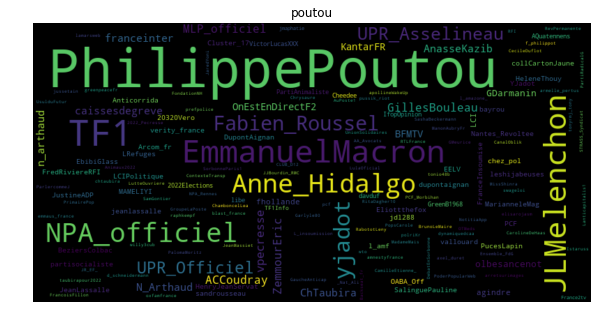

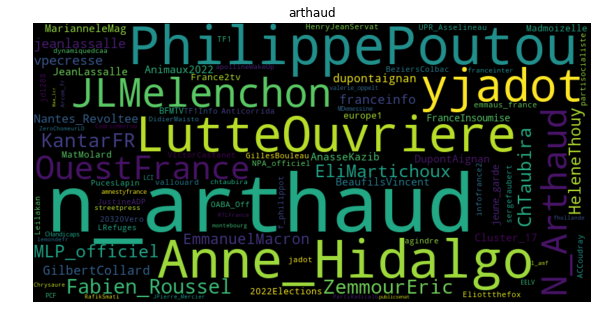

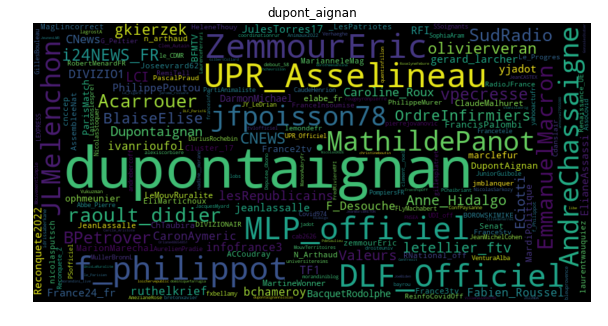

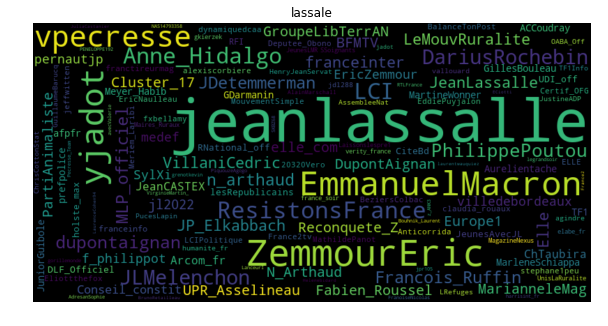

In [40]:
#convert to dict
for cand in df_hashtags['candidate'].unique():

    hashtag_weights = df_accounts[df_accounts['candidate']==cand].set_index('accounts').to_dict()['retweet_count']
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(hashtag_weights)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(cand)
    plt.axis('off')
    plt.show()

### Accounts of the authors

In [48]:
#Listing all the files in the folder:
rel_path_tweets_10RT = 'data/tweets/10'
files_tweets_10RT = [f for f in listdir(rel_path_tweets_10RT) if isfile(join(rel_path_tweets_10RT, f))]
#Initializing a pd df:
df_tweets_10RT = pd.DataFrame()
for f in files_tweets_10RT:
    df_temp = pd.read_csv(rel_path_tweets_10RT+'/'+f)
    #Concat:
    df_tweets_10RT = pd.concat([df_tweets_10RT, df_temp])

In [49]:
selected_tweet_cols = ['id', 'user_name', 'retweet_count', 'candidate']
df_tweets_red = df_tweets_10RT[selected_tweet_cols].copy()

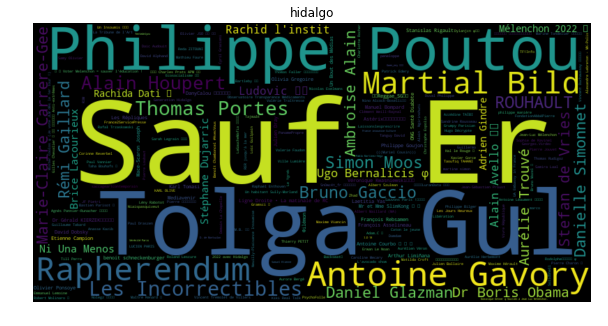

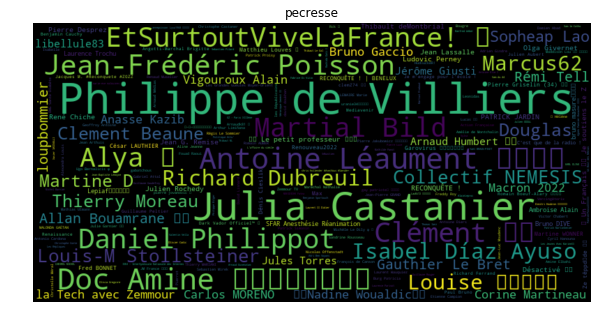

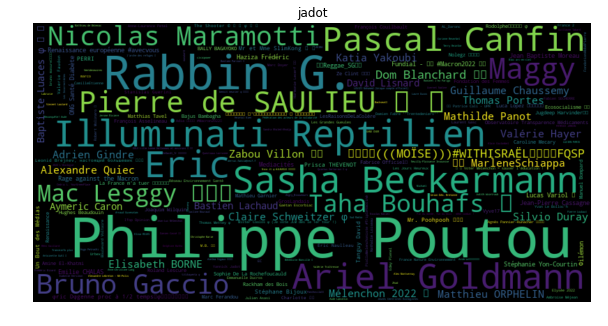

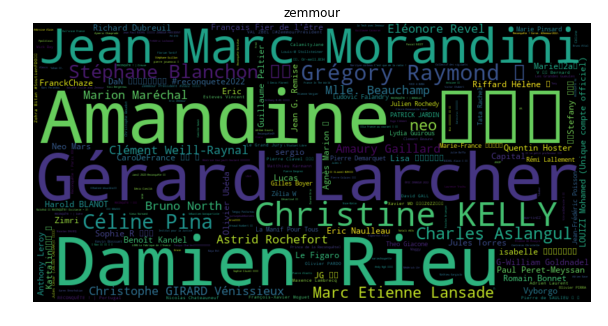

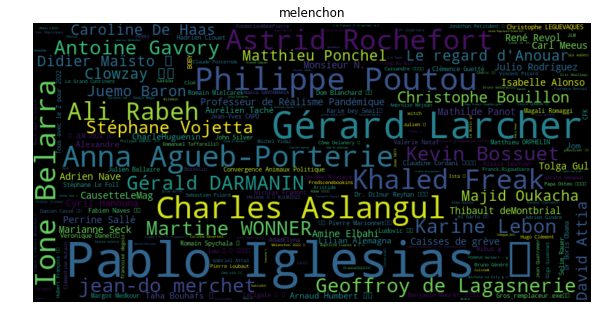

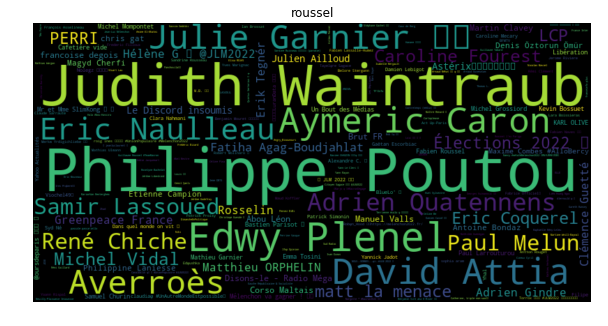

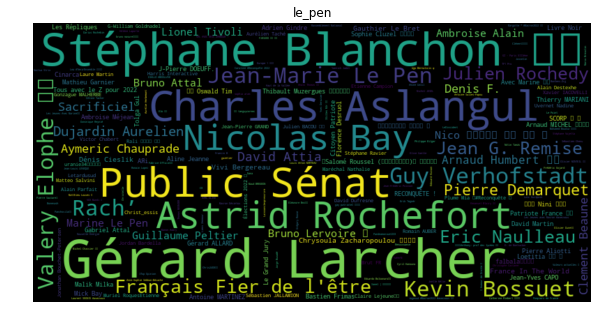

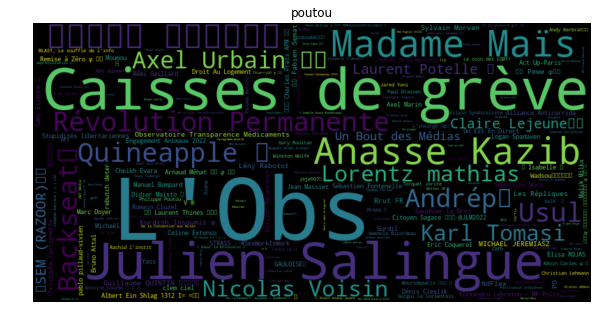

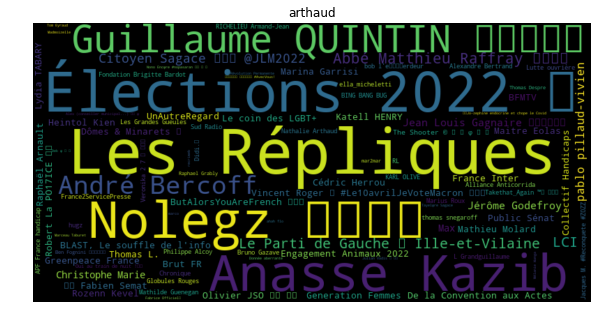

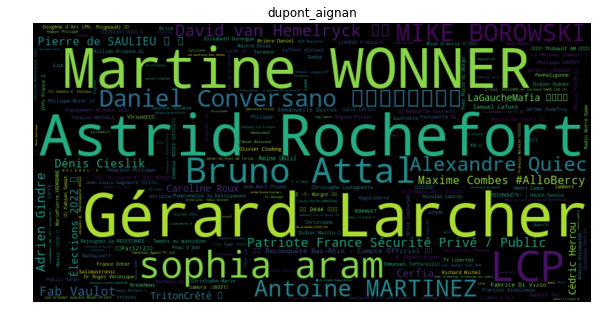

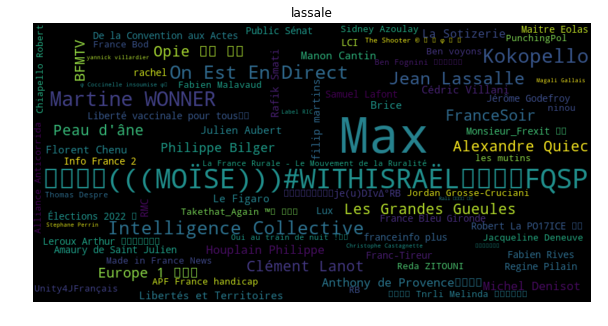

In [51]:
#convert to dict
for cand in df_hashtags['candidate'].unique():

    user_weights = df_tweets_red[df_tweets_red['candidate']==cand].set_index('user_name').to_dict()['retweet_count']
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(user_weights)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(cand)
    plt.axis('off')
    plt.show()

## Wordcloud of the complete texts? compared to factiva

## YouTube tryout

Google documentation on the Search API of YouTube: https://developers.google.com/youtube/v3/docs/search/list

Python wrapper for Youtube: https://pypi.org/project/python-youtube/

In [1]:
#pip install --upgrade python-youtube